# Knowledge Management System Solution

*Un guide rapide*
**Fabien Furfaro**

--------

## Qu'est-ce que la connaissance ? (Contexte)


- La **connaissance** est liée à la communication des données.
- Elle représente l’**information stockée et structurée**, mais ne doit pas être confondue avec le **savoir**. (Plusieurs sens sont possible)


### Pourquoi a-t-on besoin de gestion de la connaissance ?

- La gestion de la connaissance permet de transformer les données brutes en savoir utile.
- Face à l’explosion des données, il est crucial de structurer, partager et capitaliser sur cette connaissance.
- Permet un meilleur **partage**, **accès** et **utilisation** de l’information dans les organisations.


### Un peu d’histoire

```mermaid
timeline
    title Histoire de la connaissance
    3300 BC  : Invention de l'écriture, naissance de la comptabilité agricole
    2500 BC  : Premières traductions connues (ex. Pierre de Rosette)
    105 AD   : Invention du papier en Chine
    1450 AD  : Invention de l'imprimerie par Gutenberg, accélération du partage de la connaissance
    1986     : Début de la numérisation massive des données
    2002     : Début reconnu de l'ère digitale et explosion du Big Data
    2010     : Volume des données numérique estimé à plusieurs exabytes
```

- **Invention de l’écriture** (~3300 av. J.C.) liée aux besoins de comptabilité agricole.
- **Invention du papier en Chine** et plus tard de l’**imprimerie** : accélèrent le partage de connaissance.
- L’ère digitale débute en 2002 avec l’explosion des données (Big Data).
- Avec la **numérisation**, le volume de données est passé de kilo à exabytes, nécessitant des systèmes adaptés.


**Sources :**
- From the History of Science to the History of Knowledge – and Back (2015)
- A systematic review of knowledge management and knowledge sharing: Trends, issues, and challenges (2016)


--------

## Comment est gérée la connaissance aujourd’hui ?

- Systèmes classiques

- Architecture IaaS to SaaS
- Applications de gestion (CRM, ERP, SCM...)
- Bases de données relationnelles traditionnelles (SQL)

![archi](BDCC-06-00132-g001.png)



- **Data Warehouse** : stockage structuré et agrégé pour analyse.
- **Data Lake** : stockage brut hétérogène (structuré, semi-structuré, non structuré).
- **Data Lakehouse** : Evite le DataSwamp via une pipeline de préparation et de nettoyage.


```mermaid
architecture-beta
    group delta_pipeline(cloud)[Delta Pipeline]

    service internet(internet) [Internet]
    service rawdata(database) [Raw Data] in delta_pipeline
    service bronze(disk) [Bronze Filtering] in delta_pipeline
    service silver(disk) [Silver Integration] in delta_pipeline
    service gold(database) [Gold Aggregation] in delta_pipeline
    service enduser(server) [End User Reporting]

    internet:R --> L:rawdata
    rawdata:R --> L:bronze
    bronze:R --> L:silver
    silver:R --> L:gold
    gold:R --> L:enduser
```

**Sources :**
- An Overview of Data Warehouse and Data Lake in Modern Enterprise Data Management (2022)

--------

## Modèle relationnel (RDBMS)

- Basé sur le modèle relationnel utilisant des tables et relations.
- Suit les propriétés ACID (Atomicité, Cohérence, Isolation, Durabilité).
- Exemples de requêtes SQL pour extraire des informations d’une base bibliothèque:

```sql
-- Afficher nom et prénom de tous les abonnés
SELECT nom, prenom FROM ABONNE;

-- Livres écrits par Voltaire
SELECT * FROM LIVRE WHERE auteur='Voltaire';

-- Nombre de livres empruntés
SELECT COUNT(id_livre) FROM EMPRUNT;

-- Nombre de livres empruntés par abonné
SELECT id_abonne, COUNT(id_livre) FROM EMPRUNT GROUP BY id_abonne;
```

**Sources :**
- SqlAlchemy, Behaviour-Driven-Development

--------

## Limites du modèle relationnel

- Complexité des **jointures multiples** (ex. pour relations N-N).
- Difficulté à modéliser aisément des relations complexes (réseaux sociaux, graphes de connaissance).
- Performances dégradées sur des analyses en profondeur.


**Sources :**
- Neo4j, Neomodel

--------

## Modèle de bases de données graphes (NoSQL)

- Données représentées sous forme de **sommets (nœuds)** et **arêtes (relations)**.
- Permet une modélisation naturelle des relations complexes.
- Exemples de requêtes Cypher (Neo4j) :

```cypher
MATCH (p:Person)-[:WORKS_AT]->(d:Dept)
WHERE d.name = "IT Department"
RETURN p.name;
```

- Supporte également les données sémantiques avec RDF, OWL, SPARQL.

**Sources :**
- Neo4j, Protégé, Gremlin

--------

## Outils et algorithmes pour graphes

- **Graph Data Science** : classification, similarité, Node2vec.
- **Algorithmes** : recherche de chemin, détection de communautés, centralité.
- Ces outils aident à extraire de la connaissance à partir des graphes.

**Sources :**
- Barabasi Albert, Node2vec

--------

## Méthodologies ML / NLP

- Extraction d’entités nommées (entity extraction).
- Modélisation de sujets (topic modeling) avec LDA.
- Utilisation de bibliothèques : Spacy, NLTK, Gensim.
- Textes transformés en vecteurs (embeddings) pour analyse.

**Sources :**
- TF-IDF, Topic Modeling, Entity extraction, Embedding (BERT, CLIP)

--------

## Architecture de gestion du savoir (Knowledge Management Architecture)

- Combine données, relations et structure sémantique dans un **Knowledge Graph**.
- Exemple d’architecture hybride locale avec :
    - **Docker-compose** pour environnement multi-services.
    - Frontend Web en React.
    - Base graph (Neo4j) avec visualisation et requêtes Cypher/SPARQL.
    - Extraction et nettoyage via outils comme Ontotext Refine.
    - Stockage de documents (MongoDB).
    - Intégration avec outils NLP pour extraction de connaissances.

Remarques : Dans un environement de production, il est préférable de ne pas avoir plusieurs logiciels avec des fonctionnalités qui se recouvrent, c'est pourquoi, il existe **ArangoDB** qui englobe l'ensemble des fonctionnalités. De même, pour une architecture scalable, il est préférable qu'un logiciel n'est qu'une seule fonctionnalité principale.

Par exemple, *Neo4j* est un outil de gestion de base de donnée graphe, mais il contient des fonctionnalités d'analyse de données et de machine learning qui pourrait être réalisé avec un autre outil (exemple : node2vec + similarité). Cet outils n'est donc pas à privilégié dans le cadre de développement d'une application, mais plutôt lorsqu'on a un besoin d'outils "tout-en-un".

### Exemple simplifié de flux

1. Question en langage naturel reçue.
2. Extraction automatique des entités et concepts.
3. Consultation du Knowledge Graph.
4. Génération de réponse structurée.
5. Interaction finalisée via interface utilisateur.

**Sources :**
- Construction of Knowledge Graphs: State and Challenges  (2023)

--------

## Cas d'usages

La gestion des connaissances est essentielle pour tirer parti des données numériques massives. Elle combine plusieurs techniques : bases de données, graphes, NLP, apprentissage automatique. Aujourd'hui, Les architectures modernes sont hybrides et intégrées pour optimiser la valorisation des savoirs d’une entreprise.

Pour ce cas d'usage, nous utiliserons la base de donnée multi-modèles **ArangoDB**. Les données seront généré par des outils de ML. L'objectif est d'arriver construire une base de données graphe à partir de ces CSV, tout en respectant la structure ci-dessus. Pour cela, nous aurons besoin de quelques **prérequis** :
- Le serveur ArangoDB (Sur windows installer le NSIS)
- Optionnellement OpenJDK 21 (LTS, supporté par les entreprises, voir avec votre SI)
- Python (obvious)
- Le gestionnaire de package Chocolatey (optionnel et uniquement sur Windows)

Une fois le serveur ArangoDB installé, vous pouvez le lancer directement sur PowerShell via la commande *arangod*, l'interface *HTTP* sera ensuite accessible avec le lien http://127.0.0.1:8529/. Vous pouvez également lancer via *subprocess* par la commande suivante (non recommandé) :

In [2]:
import subprocess
process = subprocess.Popen(['powershell', '-Command', "arangod.exe"],
                           stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

Pour ces exercices, nous devons avoir les packages suivants :

In [18]:
#!pip install python-arango node2vec networkx scikit-learn gensim spacy nltk

### Exercice n°1 : les réseaux sociaux

In [15]:
from arango import ArangoClient
import random
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt

**Connexion à ArangoDB en Python et création de base & collections**

In [9]:
# Connexion au serveur ArangoDB
client = ArangoClient(hosts='http://127.0.0.1:8529')
db = client.db('_system', username='root', password='password')  # Adaptez le mot de passe

# Créer une base de données dédiée
if not db.has_database('my_knowledge_db'):
    db.create_database('my_knowledge_db')
db = client.db('my_knowledge_db', username='root', password='password')

# Création d'une collection document (tabulaire)
if not db.has_collection('persons'):
    persons = db.create_collection('persons')
else:
    persons = db.collection('persons')

# Création d'une collection graphe
if not db.has_graph('social_graph'):
    graph = db.create_graph('social_graph')
else:
    graph = db.graph('social_graph')

# Créer les collections d'arêtes et de noeuds pour le graphe
if not graph.has_vertex_collection('people'):
    people = graph.create_vertex_collection('people')
else:
    people = graph.vertex_collection('people')

if not graph.has_edge_definition('knows'):
    graph.create_edge_definition(
        edge_collection='knows',
        from_vertex_collections=['people'],
        to_vertex_collections=['people']
    )
knows = graph.edge_collection('knows')


**Insérer des données tabulaires et graphes aléatoires**

In [12]:
def edge_exists(db, edge_collection_name, from_key, to_key):
    query = f"""
    FOR edge IN {edge_collection_name}
      FILTER edge._from == @from_key AND edge._to == @to_key
      RETURN edge
    """
    cursor = db.aql.execute(query, bind_vars={'from_key': from_key, 'to_key': to_key})
    return any(True for _ in cursor)

for _ in range(50):
    from_user = f'user{random.randint(1, 20)}'
    to_user = f'user{random.randint(1, 20)}'
    
    if from_user != to_user:
        from_full = f'people/{from_user}'
        to_full = f'people/{to_user}'
        if not edge_exists(db, 'knows', from_full, to_full):
            knows.insert({'_from': from_full, '_to': to_full})

**Récupération de certaines informations de noeuds et application de node2vec**

In [13]:
# Charger le graphe depuis ArangoDB dans un graphe NetworkX
G = nx.DiGraph()

# Ajouter les noeuds
for person_doc in people.all():
    G.add_node(person_doc['_key'], name=person_doc['name'])

# Ajouter les arêtes
for edge in knows.all():
    from_node = edge['_from'].split('/')[1]
    to_node = edge['_to'].split('/')[1]
    G.add_edge(from_node, to_node)

# Appliquer node2vec pour extraire des embeddings
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=2)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Exemple : Trouver les noeuds similaires à 'user1'
similar_nodes = model.wv.most_similar('user1', topn=5)
print(f'Noeuds similaires à user1 : {similar_nodes}')


Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]

Noeuds similaires à user1 : [('user20', 0.9701040983200073), ('user8', 0.9648362398147583), ('user7', 0.9471918344497681), ('user13', 0.9461076259613037), ('user5', 0.9081969857215881)]


**Visualisation avec matplotlib**

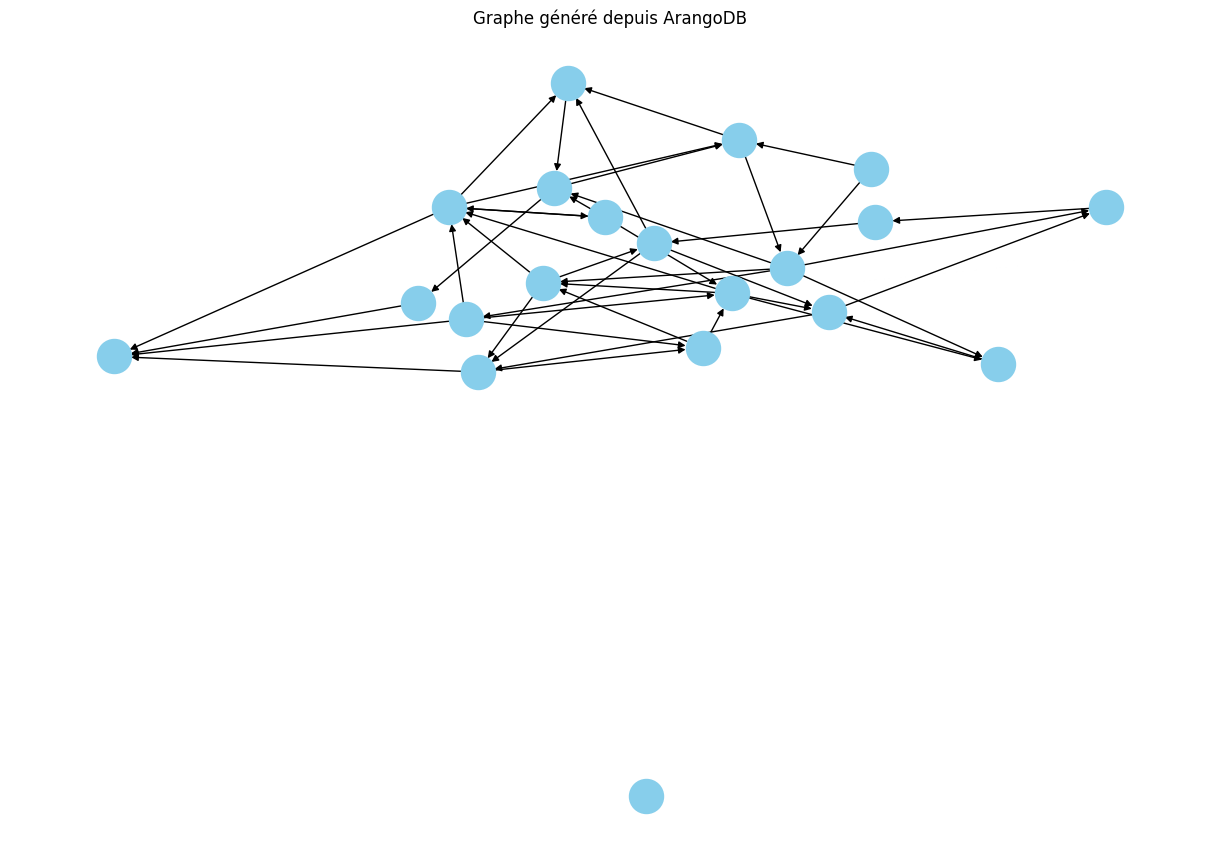

In [16]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=600, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Graphe généré depuis ArangoDB')
plt.show()

Pour voir sur la page web, il suffit de se connecter à la base *MY_KNOWLEDGE_DB* (en haut à droite) et lancer la querie :

```sql
LET vertices = (FOR v IN people RETURN v)
LET edges = (FOR e IN knows RETURN e)

RETURN { vertices, edges }
```

### Exercice n°2 : Extraction de la connaissance Web

Importer les base données (à faire une seule fois)

In [20]:
#!python -m spacy download en_core_web_sm
#!python -c "import nltk; nltk.download('punkt'); nltk.download('stopwords'); nltk.download('punkt_tab');"

In [ ]:
from arango import ArangoClient
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
import spacy
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('punkt_tab')

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.corpus import stopwords

In [25]:
# Connexion ArangoDB
client = ArangoClient(hosts='http://127.0.0.1:8529')
sys_db = client.db('_system', username='root', password='password')  # Modifier mot de passe

# Création base et collections
db_name = 'nlp_nltk_knowledge'
if not sys_db.has_database(db_name):
    sys_db.create_database(db_name)
db = client.db(db_name, username='root', password='password')

# Création collections documents (vertex)
vertex_collections = ['documents', 'entities', 'collocations', 'topics']
for coll in vertex_collections:
    if not db.has_collection(coll):
        db.create_collection(coll)

from arango.graph import Graph
if not db.has_graph('nlp_graph'):
    db.create_graph('nlp_graph')

graph = db.graph('nlp_graph')
for v_coll in vertex_collections:
    if not graph.has_vertex_collection(v_coll):
        graph.create_vertex_collection(v_coll)

# Création collections arêtes (edge) avec nom unique pour collocates
edge_definitions = [
    ('mentions', ['documents'], ['entities']),
    ('topic_of', ['documents'], ['topics']),
    ('documents_collocates_collocations', ['documents'], ['collocations'])  # edge collection distincte
]
for e_coll, from_colls, to_colls in edge_definitions:
    if not graph.has_edge_definition(e_coll):
        graph.create_edge_definition(e_coll, from_colls, to_colls)

mentions = graph.edge_collection('mentions')
topic_of = graph.edge_collection('topic_of')
collocates = graph.edge_collection('documents_collocates_collocations')

# Corpus exemple
texts = [
    "Artificial intelligence and machine learning are evolving fields.",
    "Natural language processing enables understanding human language.",
    "Graph databases efficiently represent complex relationships.",
    "Deep learning and neural networks enhance NLP tasks.",
]

# TF-IDF (scikit-learn)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
tfidf_terms = vectorizer.get_feature_names_out()

# Topic modeling (Gensim)
tokenized_texts = [nltk.word_tokenize(t.lower()) for t in texts]
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
lda = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=5)
topics = lda.show_topics(formatted=False)

# NER avec spaCy
nlp = spacy.load('en_core_web_sm')

# Collocations avec NLTK (bigrammes)
all_tokens = []
stop_words = set(stopwords.words('english'))
for t in texts:
    tokens = [w.lower() for w in nltk.word_tokenize(t) if w.isalpha() and w.lower() not in stop_words]
    all_tokens.extend(tokens)
finder = BigramCollocationFinder.from_words(all_tokens)
bigram_measures = BigramAssocMeasures()
collocs = finder.nbest(bigram_measures.pmi, 5)  # Top 5 collocations

# Insertion ArangoDB
docs_col = db.collection('documents')
entities_col = db.collection('entities')
topics_col = db.collection('topics')
collocs_col = db.collection('collocations')

for i, text in enumerate(texts):
    doc_key = f'doc{i}'
    if not docs_col.has(doc_key):
        docs_col.insert({'_key': doc_key, 'text': text})

    # Extraction d'entités
    spacy_doc = nlp(text)
    for ent in spacy_doc.ents:
        ent_key = ent.text.replace(" ", "_")
        if not entities_col.has(ent_key):
            entities_col.insert({'_key': ent_key, 'entity': ent.text, 'label': ent.label_})
        edge_key = f"{doc_key}_{ent_key}"
        if not mentions.has(edge_key):
            mentions.insert({'_key': edge_key, '_from': f'documents/{doc_key}', '_to': f'entities/{ent_key}'})

    # Mapping topics (topic dominant LDA)
    bow = dictionary.doc2bow([w.lower() for w in nltk.word_tokenize(text)])
    topic_dist = lda.get_document_topics(bow)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    topic_key = f"topic_{dominant_topic}"
    if not topics_col.has(topic_key):
        topics_col.insert({'_key': topic_key, 'words': [w for w, _ in topics[dominant_topic][1]]})
    edge_key = f"{doc_key}_{topic_key}"
    if not topic_of.has(edge_key):
        topic_of.insert({'_key': edge_key, '_from': f'documents/{doc_key}', '_to': f'topics/{topic_key}'})

# Insertion collocations (corpus)
for colloc in collocs:
    colloc_key = "_".join(colloc)
    if not collocs_col.has(colloc_key):
        collocs_col.insert({'_key': colloc_key, 'words': list(colloc)})
    # Lier collocations aux documents où il apparaît
    for i, text in enumerate(texts):
        if all(w in text.lower() for w in colloc):
            edge_key = f"doc{i}_{colloc_key}"
            if not collocates.has(edge_key):
                collocates.insert({'_key': edge_key, '_from': f'documents/doc{i}', '_to': f'collocations/{colloc_key}'})


- 6. Requête pour afficher un sous-ensemble du graphe : Documents et leurs entités associées

```sql
FOR doc IN documents
  LET mentionsEdges = (
    FOR e IN mentions
      FILTER e._from == doc._id
      FOR ent IN entities
        FILTER ent._id == e._to
        RETURN ent
  )
  RETURN { document: doc, entities: mentionsEdges }
```


- 7. Exemple de recherche des chemins les plus courts entre deux nœuds (documents, entités, topics)

```sql
FOR vertex, edge IN OUTBOUND SHORTEST_PATH
  'documents/doc0' TO 'entities/Natural_Language_Processing'
  GRAPH 'nlp_graph'
  RETURN {
    vertex: vertex,
    edge: edge
  }
```

- 7. Si aucune fonction de chemin n’est trouvée, vous pouvez faire un simple parcours limité (BFS) en AQL : 

```sql
FOR v, e, p IN 1..3 OUTBOUND 'documents/doc0' GRAPH 'nlp_graph'
  RETURN {vertex: v, edge: e, path: p}
```

Et pour faire un affichage : 

```sql
LET vertices = (FOR v IN UNION( 
  (FOR d IN documents RETURN d),
  (FOR e IN entities RETURN e),
  (FOR c IN collocations RETURN c),
  (FOR t IN topics RETURN t)
) RETURN v)

LET edges = (
  FOR edge IN UNION(
    (FOR m IN mentions RETURN m),
    (FOR to IN topic_of RETURN to),
    (FOR co IN documents_collocates_collocations RETURN co)
  )
  RETURN edge
)

RETURN { vertices, edges }
```

**Extraction du graphe en Python**

In [27]:
import json
import csv
from arango import ArangoClient

# Connexion ArangoDB
client = ArangoClient(hosts='http://127.0.0.1:8529')
db = client.db('nlp_nltk_knowledge', username='root', password='password')

# Collections vertex
vertex_colls = ['documents', 'entities', 'collocations', 'topics']

# Collections edge
edge_colls = ['mentions', 'topic_of', 'documents_collocates_collocations']

# Extraire tous les sommets
all_vertices = []
for coll in vertex_colls:
    collection = db.collection(coll)
    cursor = collection.all()
    for doc in cursor:
        doc['_collection'] = coll  # On marque la collection origine
        all_vertices.append(doc)

# Extraire toutes les arêtes
all_edges = []
for coll in edge_colls:
    collection = db.collection(coll)
    cursor = collection.all()
    for edge in cursor:
        edge['_collection'] = coll
        all_edges.append(edge)

# Construit un dictionnaire global
graph_data = {
    'vertices': all_vertices,
    'edges': all_edges
}

# Affichage JSON (joli)
print(json.dumps(graph_data, indent=4))

with open('graph_data.json', 'w', encoding='utf-8') as f_json:
    json.dump(graph_data, f_json, indent=4, ensure_ascii=False)

{
    "vertices": [
        {
            "_key": "doc0",
            "_id": "documents/doc0",
            "_rev": "_kFoB27S---",
            "text": "Artificial intelligence and machine learning are evolving fields.",
            "_collection": "documents"
        },
        {
            "_key": "doc1",
            "_id": "documents/doc1",
            "_rev": "_kFoB28u---",
            "text": "Natural language processing enables understanding human language.",
            "_collection": "documents"
        },
        {
            "_key": "doc2",
            "_id": "documents/doc2",
            "_rev": "_kFoB3-i---",
            "text": "Graph databases efficiently represent complex relationships.",
            "_collection": "documents"
        },
        {
            "_key": "doc3",
            "_id": "documents/doc3",
            "_rev": "_kFoB3_y---",
            "text": "Deep learning and neural networks enhance NLP tasks.",
            "_collection": "documents"
        },
  

*Export CSV des sommets et arêtes*

In [29]:
vertex_fields = ['_key', 'text', 'entity', 'label', 'words', '_collection']

with open('vertices.csv', 'w', newline='', encoding='utf-8') as f_csv:
    writer = csv.DictWriter(f_csv, fieldnames=vertex_fields)
    writer.writeheader()
    for v in all_vertices:
        # Choix prudents pour remplir les colonnes
        row = {field: v.get(field, '') for field in vertex_fields}
        writer.writerow(row)

edge_fields = ['_key', '_from', '_to', '_collection']

with open('edges.csv', 'w', newline='', encoding='utf-8') as f_csv:
    writer = csv.DictWriter(f_csv, fieldnames=edge_fields)
    writer.writeheader()
    for e in all_edges:
        row = {field: e.get(field, '') for field in edge_fields}
        writer.writerow(row)

**Affichage :**

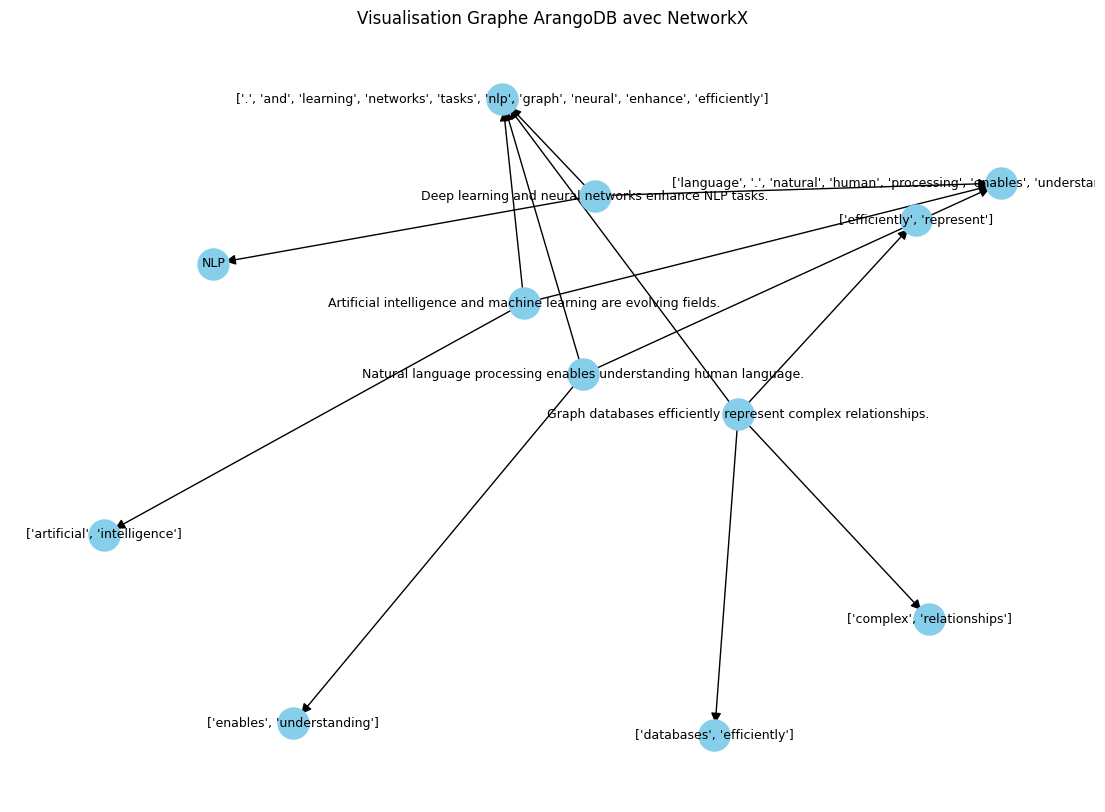

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from arango import ArangoClient

# Connexion ArangoDB
client = ArangoClient(hosts='http://127.0.0.1:8529')
db = client.db('nlp_nltk_knowledge', username='root', password='password')

# Collections graph
vertex_collections = ['documents', 'entities', 'collocations', 'topics']
edge_collections = ['mentions', 'topic_of', 'documents_collocates_collocations']

# Construction du graphe NetworkX
G = nx.DiGraph()

# Charger les noeuds
for vcoll in vertex_collections:
    collection = db.collection(vcoll)
    for doc in collection.all():
        label = doc.get('text') or doc.get('entity') or str(doc.get('words')) or doc.get('_key')
        G.add_node(doc['_id'], label=label)

# Charger les arêtes
for ecoll in edge_collections:
    collection = db.collection(ecoll)
    for edge in collection.all():
        G.add_edge(edge['_from'], edge['_to'], key=edge['_key'])

# Positionnement des noeuds
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Récupérer les labels à afficher
labels = {node: data['label'] for node, data in G.nodes(data=True)}

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15)
nx.draw_networkx_labels(G, pos, labels, font_size=9)
plt.title('Visualisation Graphe ArangoDB avec NetworkX')
plt.axis('off')
plt.show()
